# importing libraries

In [77]:
import sklearn

In [78]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [79]:
os.getcwd()

'D:\\SUSHMITHA\\Dataframes_csvFiles'

In [80]:
os.chdir("D:\SUSHMITHA\Dataframes_csvFiles")

In [81]:
os.getcwd()

'D:\\SUSHMITHA\\Dataframes_csvFiles'

# importing dataset

In [82]:
df=pd.read_csv('auto-mpg.csv')

In [83]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [84]:
df.shape

(398, 9)

In [85]:
len(df)

398

In [86]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [87]:
df.columns.tolist()

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin',
 'car name']

In [88]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [89]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [90]:
df.ndim

2

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [92]:
df.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


# handling missing values

In [93]:
df['horsepower'].dtypes

dtype('O')

In [94]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [95]:
df['horsepower']=df['horsepower'].replace('?',np.nan)

In [96]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [97]:
df['horsepower']=df['horsepower'].astype('float64')

In [98]:
df['horsepower'].dtype

dtype('float64')

In [99]:
df['horsepower'].isnull().sum()

6

In [100]:
df['horsepower']=df['horsepower'].fillna(df['horsepower'].median())

In [101]:
df['horsepower'].isnull().sum()

0

# Visualisation

In [102]:
corr_table=df.corr()
corr_table

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


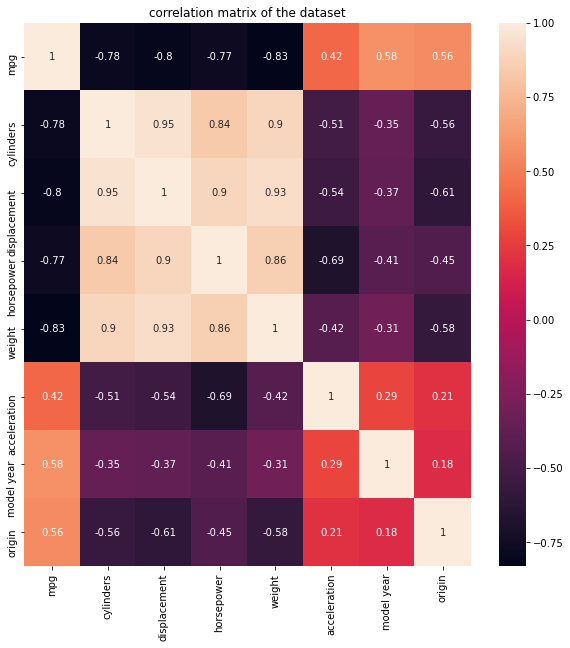

In [103]:
plt.figure(figsize=(10,10))
g=sns.heatmap(corr_table,annot=True)
g.set(title="correlation matrix of the dataset")
plt.show()

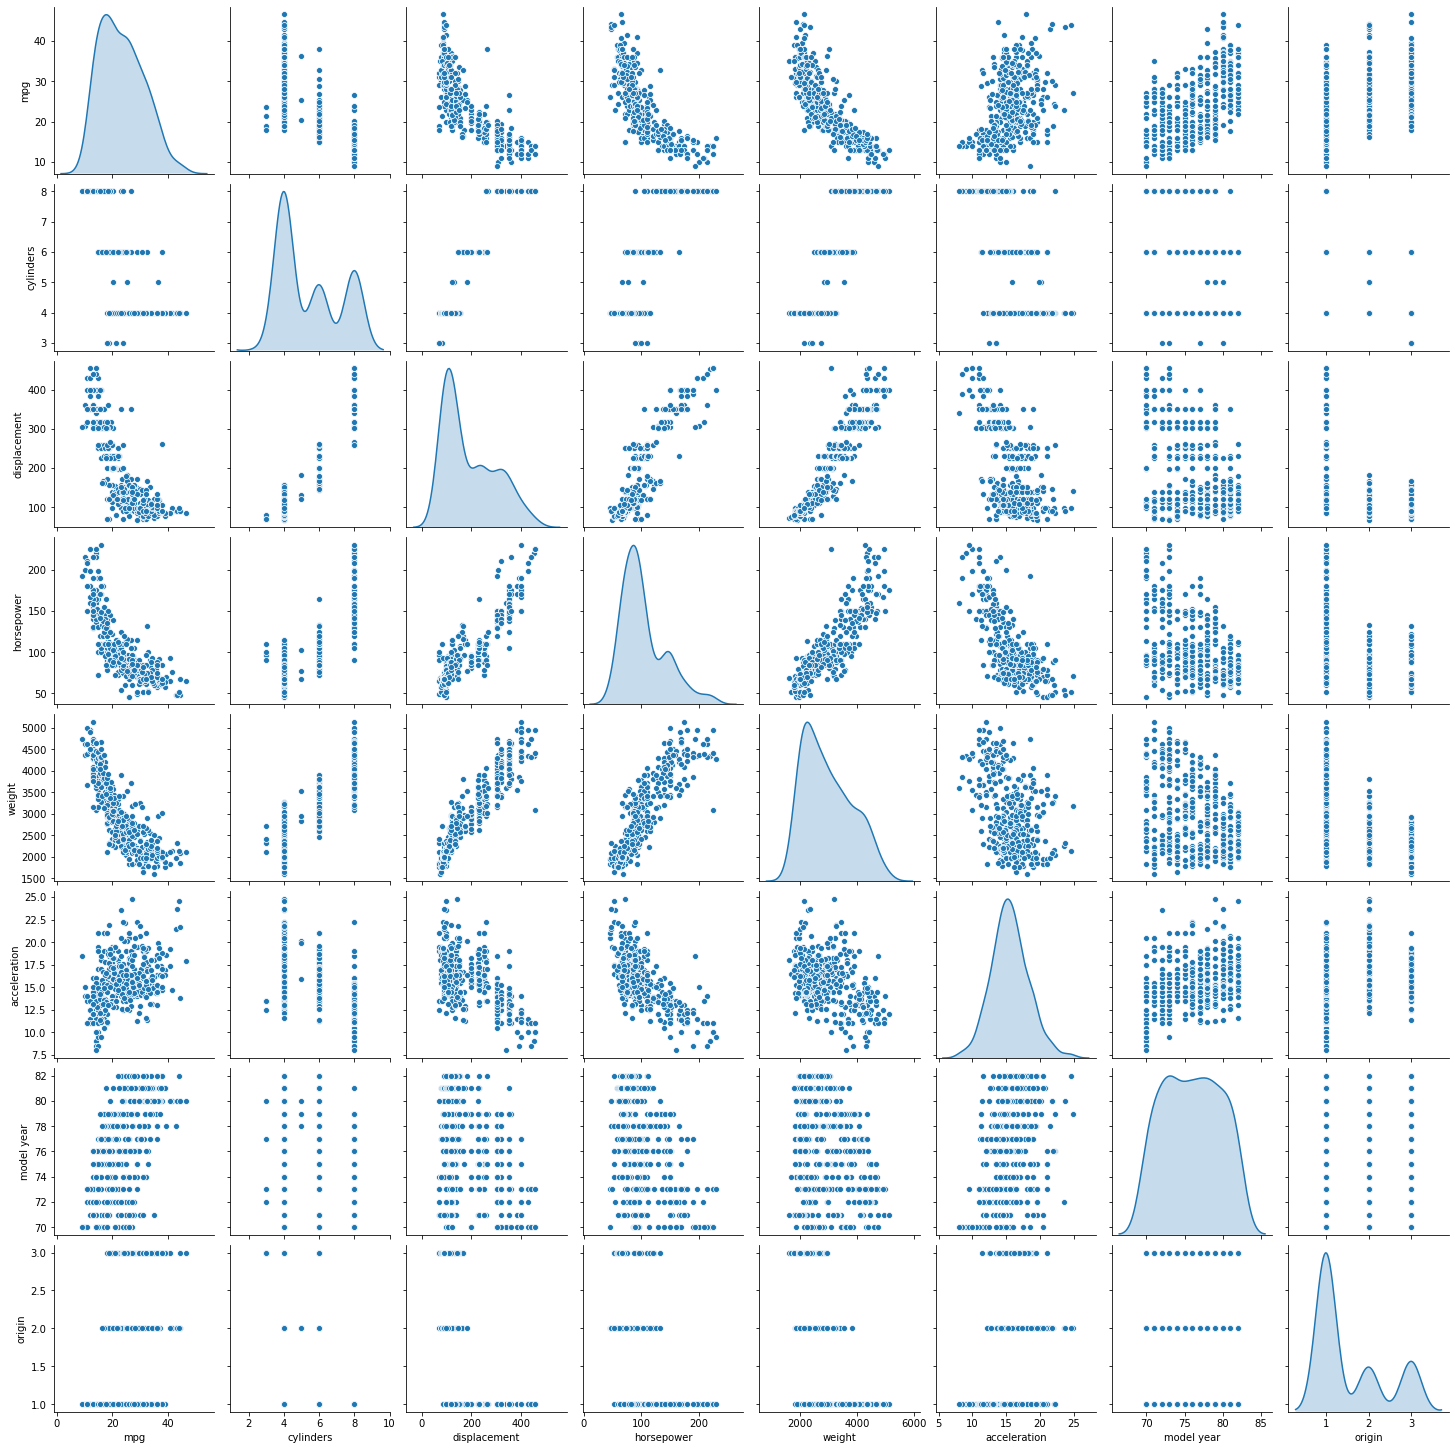

In [104]:
sns.pairplot(df,diag_kind='kde')
plt.show()

# Splitting the dataset into independent and dependent variable

In [105]:
#removing  columns which doesnot affect the dependent variable
df=df.drop('acceleration',axis=1)

In [106]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,model year,origin,car name
0,18.0,8,307.0,130.0,3504,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,70,1,ford torino


In [107]:
df=df.drop('car name',axis=1)

In [108]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,model year,origin
0,18.0,8,307.0,130.0,3504,70,1
1,15.0,8,350.0,165.0,3693,70,1
2,18.0,8,318.0,150.0,3436,70,1
3,16.0,8,304.0,150.0,3433,70,1
4,17.0,8,302.0,140.0,3449,70,1


In [109]:
df.shape

(398, 7)

In [110]:
#dependent variable is mpg
y=df['mpg']

In [111]:
y.shape

(398,)

In [112]:
X=df.iloc[:,1:]

In [113]:
X.shape

(398, 6)

# Splitting the dataset into training and testing sets

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [116]:
X_train

,cylinders,displacement,horsepower,weight,model year,origin
298,8,350.0,125.0,3900,79,1
13,8,455.0,225.0,3086,70,1
376,4,91.0,68.0,2025,82,3
61,4,122.0,86.0,2226,72,1
346,4,97.0,67.0,2065,81,3
...,...,...,...,...,...,...
393,4,140.0,86.0,2790,82,1
255,4,140.0,88.0,2720,78,1
72,8,304.0,150.0,3892,72,1
235,4,97.0,75.0,2265,77,3


In [117]:
X_train.shape

(318, 6)

In [118]:
X_test

,cylinders,displacement,horsepower,weight,model year,origin
174,6,171.0,97.0,2984,75,1
359,4,141.0,80.0,3230,81,2
250,8,318.0,140.0,3735,78,1
274,5,131.0,103.0,2830,78,2
283,6,232.0,90.0,3265,79,1
...,...,...,...,...,...,...
146,4,90.0,75.0,2125,74,1
327,5,121.0,67.0,2950,80,2
223,8,318.0,145.0,4140,77,1
159,8,351.0,148.0,4657,75,1


In [119]:
X_test.shape

(80, 6)

In [120]:
y_train

298    23.0
13     14.0
376    37.0
61     21.0
346    32.3
       ... 
393    27.0
255    25.1
72     15.0
235    26.0
37     18.0
Name: mpg, Length: 318, dtype: float64

In [121]:
y_test

174    18.0
359    28.1
250    19.4
274    20.3
283    20.2
       ... 
146    28.0
327    36.4
223    15.5
159    14.0
23     26.0
Name: mpg, Length: 80, dtype: float64

# Create a model

In [122]:
from sklearn import linear_model

In [123]:
reg=linear_model.LinearRegression()

In [124]:
reg.fit(X,y)

LinearRegression()

In [125]:
reg.coef_

array([-0.43532699,  0.01820559, -0.02061264, -0.00639302,  0.75192415,
        1.4214872 ])

In [126]:
reg.intercept_

-15.8818722975587

# Evaluate a model

In [127]:
y_predict=reg.predict(X_test)

In [128]:
y_predict

array([21.3589118 , 26.39416127, 19.73274781, 25.60412461, 23.82499829,
       15.56028023, 28.40244296, 34.78375312, 16.93505771, 10.84693029,
       30.03999574, 16.46554598, 22.00105184, 26.43157848, 36.57008974,
       22.96948873, 10.66846967, 20.38538709,  9.01810472, 33.33703524,
       26.93238682, 30.87364438, 20.91263521, 26.36278578, 25.64789577,
       28.46162205, 32.94378794, 32.94939212, 15.25446988, 29.8738306 ,
       26.78580035, 10.58702202, 20.70488694, 29.40657306, 25.1147138 ,
       13.5008099 , 26.68402355,  8.94130179, 31.51039116, 24.19246285,
       24.47131155, 24.79794431, 20.4840518 , 32.51118038, 25.84761074,
       22.01048122, 20.82176336, 11.84262606, 29.37633275, 19.05532468,
       25.61086162, 26.72751789, 16.66264765, 12.18806519, 28.50424138,
       26.02216164, 10.09942868, 13.03517176, 31.16999029, 36.01243226,
       34.60563948, 36.01243226, 17.71409935, 27.29469666, 19.73261051,
       31.8846709 , 26.51887822, 26.09806281, 29.51182741, 12.55

In [129]:
df1=pd.DataFrame({'y1':y_predict,'y2':y_test})

In [130]:
df1

,y1,y2
174,21.358912,18.0
359,26.394161,28.1
250,19.732748,19.4
274,25.604125,20.3
283,23.824998,20.2
...,...,...
146,25.948074,28.0
327,26.900809,36.4
223,16.288586,15.5
159,12.018491,14.0


In [131]:
b=reg.score(X_train,y_train)
print("the accuracy of the model is "+str(b))

the accuracy of the model is 0.8089506531593494


In [132]:
a=metrics.mean_squared_error(y_predict,y_test)
print("The average mean squared error is "+str(a))

The average mean squared error is 7.287663751366088


# save model to a file using python pickle

In [133]:
import pickle
with open('reg_pickle','wb') as f:
    pickle.dump(reg,f)

In [134]:
#load saved file

In [135]:
with open('reg_pickle','rb') as f:
    mp=pickle.load(f)

In [136]:
reg.predict([[8,307,130,3504,70,1]])

array([15.20000795])

In [137]:
reg_model.predict([[8,307,130,3504,70,1]])

array([15.20000795])

In [138]:
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,model year,origin
0,18.0,8,307.0,130.0,3504,70,1
1,15.0,8,350.0,165.0,3693,70,1
